# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [5]:
nndb = pd.read_csv('data/nndb_flat.csv')
nndb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [62]:
nndb.set_index('ID', inplace=True)
nndb.head()

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

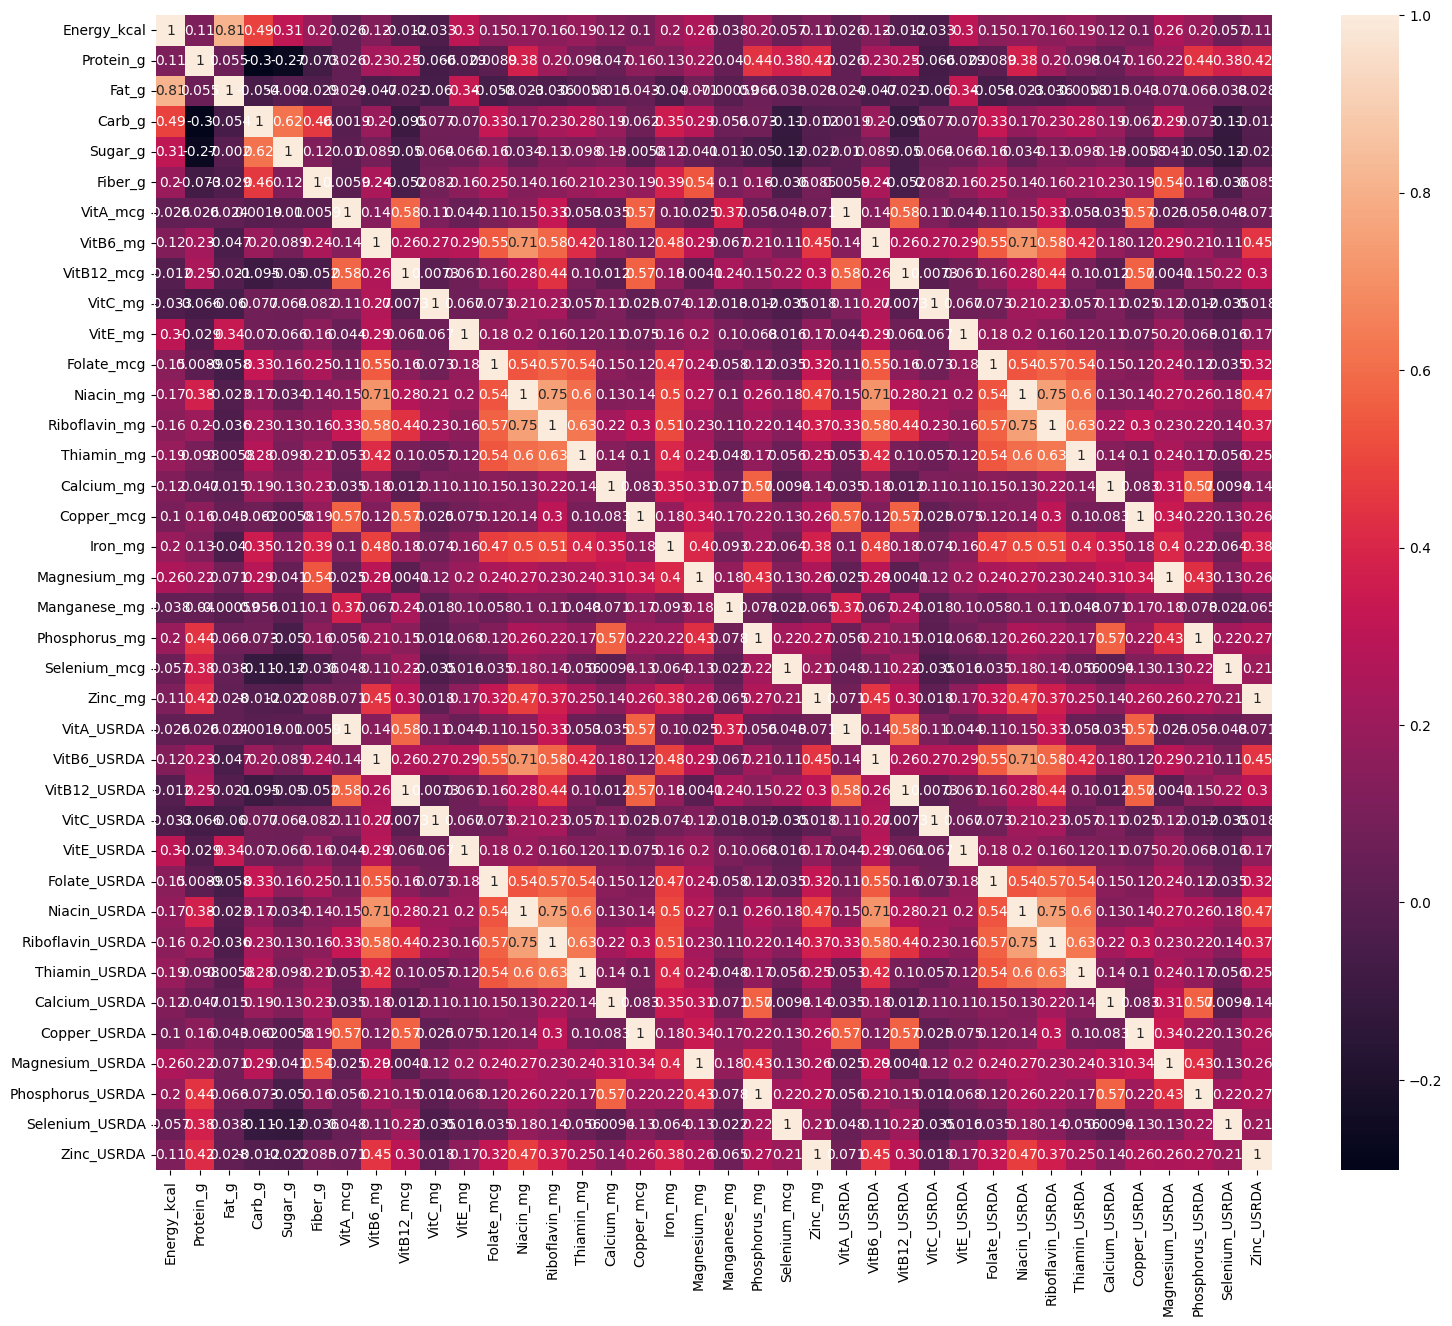

In [63]:
plt.figure(figsize=(18,15))
sns.heatmap(nndb.corr(numeric_only=True), annot=True)

In [64]:
columnas_a_eliminar = [col for col in nndb.columns if 'USRDA' in col]
nndb1 = nndb.drop(columnas_a_eliminar, axis=1)
nndb1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   fl

### Variables no numéricas
Elimina las variables de texto del dataset

In [65]:
columnas_object = nndb1.select_dtypes(include=['object']).columns
nndb2 = nndb1.drop(columnas_object, axis=1)
nndb2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesium

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [66]:
nndb2 = nndb2 + 1
nndb_log = nndb2.applymap(np.log)
nndb_log.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,5.075155,2.073285,1.783379,2.118534,1.018775,0.670117,1.698699,0.197749,0.454007,0.804010,...,0.181921,0.156594,3.153335,0.126583,0.939353,2.809058,0.183168,4.262292,1.698225,0.800092
std,0.974674,1.056886,1.181014,1.610507,1.278396,0.819444,2.044344,0.240045,0.654592,1.266192,...,0.216586,0.222113,1.507092,0.202792,0.712336,1.292329,0.382983,1.718525,1.434322,0.695503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.543295,1.244155,0.689388,0.039221,0.000000,0.000000,0.000000,0.033676,0.000000,0.000000,...,0.044973,0.029559,2.302585,0.029559,0.425268,2.397895,0.000000,3.637586,0.095310,0.207014
50%,5.257495,2.228400,1.830178,2.297070,0.314811,0.262364,0.895880,0.113329,0.076961,0.000000,...,0.139762,0.074643,2.995732,0.076035,0.845868,3.044522,0.021761,4.897840,1.589235,0.612476
75%,5.820083,3.043450,2.701361,3.523415,1.840550,1.223775,3.091042,0.303801,0.831820,1.252763,...,0.231112,0.201307,4.143135,0.135186,1.275363,3.401197,0.200489,5.379897,3.104587,1.308333
max,6.805723,4.492225,4.615121,4.615121,4.613138,4.382027,10.308986,2.564949,4.604070,7.783641,...,2.917771,3.193558,8.904494,2.775709,4.825109,6.661855,5.796058,9.202207,7.559038,4.521245


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nndb_scaled = scaler.fit_transform(nndb_log)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(nndb_scaled)

PCA()

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

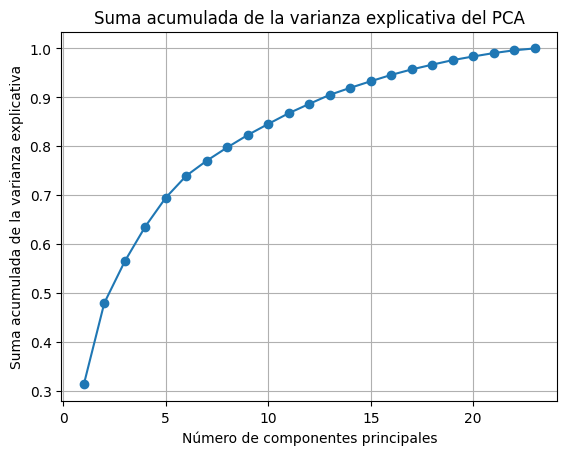

In [69]:
varianza_explicativa = pca.explained_variance_ratio_
suma_varianza = np.cumsum(varianza_explicativa)

# Diagrama de líneas de la suma acumulada de la varianza explicativa
plt.plot(range(1, len(suma_varianza) + 1), suma_varianza, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Suma acumulada de la varianza explicativa')
plt.title('Suma acumulada de la varianza explicativa del PCA')
plt.grid(True)
plt.show()

# Para quedarme con un 70-75% de la varianza original, me tendría que quedar con 6-7 componentes principales

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [106]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=6))
modelo_pca = pca_pipe['pca']
componentes_principales = pca_pipe.fit_transform(X=nndb_log)
proyecciones = pd.DataFrame(
    componentes_principales,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index   = nndb_log.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6
ID,,,,,,
1001,-2.139032,-0.968024,-1.464020,0.270764,4.066858,0.307673
1002,-2.106485,-0.909505,-1.480619,0.263192,4.032426,0.348967
1003,-3.267830,-1.138426,-2.042377,1.175667,4.071736,1.327479
1004,1.525967,-1.264110,0.136156,-0.930206,2.429064,-2.096827
1005,1.240714,-1.204116,0.004859,-1.191932,2.690618,-2.343580


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [115]:
indices_valores_altos = []
for i in range(componentes_principales.shape[1]):
    valores_componente = componentes_principales[:, i]
    indices_valores_altos.append(sorted(range(len(valores_componente)), key=lambda k: valores_componente[k], reverse=True)[:3])

# Obtener los nombres de las columnas correspondientes a los índices
columnas_valores_altos = []
for indices in indices_valores_altos:
    columnas_valores_altos.append([nndb_log.columns[idx] for idx in indices if idx < len(nndb_log.columns)])

# Imprimir las columnas con los valores más altos para cada componente principal
for i, columnas in enumerate(columnas_valores_altos):
    print(f"Componente Principal {i+1}:")
    for columna in columnas:
        print(f" - {columna}")
    print()

Componente Principal 1:

Componente Principal 2:

Componente Principal 3:

Componente Principal 4:

Componente Principal 5:

Componente Principal 6:



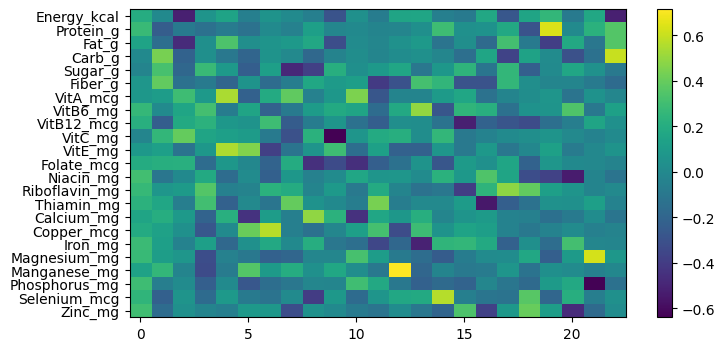

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(nndb_log.columns)), nndb_log.columns)
plt.grid(False)
plt.colorbar();